### 작업 경로 설정

In [185]:
path = 'C:\\Users\\rkdgu\\Desktop\\project_data'

In [186]:
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Twitter
from konlpy.utils import pprint
from konlpy.tag import Kkma
from tensorflow.keras.optimizers import SGD
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
import FinanceDataReader as fdr
import pandas as pd
import csv
import os

In [187]:
os.chdir(path)

### IBK 뉴스 데이터와 변화율을 join한것. csv 파일로 저장된거 불러옴

In [188]:
article = pd.read_csv('ibk.csv') # 2010.4.18 ~ 2019.4.18

In [189]:
article

,Unnamed: 0,Date,content,change
0,0,2010-04-18,금융상품 인증 우대금리 구매 어치 적립 단체 분할 입금 설정 본인 이용자 제출 근무...,0.000000
1,1,2010-04-19,금융상품 인증 우대금리 구매 어치 적립 단체 분할 입금 설정 본인 이용자 제출 근무...,-0.009375
2,2,2010-04-23,사업자 하이닉스 역대 전반적 호조 견인 부가 공정 아이비케이투자증권 선전 디스플레이...,0.042904
3,3,2010-04-25,한국투자증권 라운드 설정 잔액 장비 포스 한국전력 자문 사가 포트폴리오 기본 편입 ...,0.042904
4,4,2010-04-26,한국투자증권 라운드 설정 잔액 장비 포스 한국전력 자문 사가 포트폴리오 기본 편입 ...,0.000000
5,6,2010-05-07,투자은행 골드 이해 접근 유명 보험사 이야기 파생 독일 구매 금융위기 수상 직전 자...,0.025455
6,7,2010-05-10,지식 전보 가스 체육 관광 승진 행정 재정 진흥 강원 학교 소장 단장 창원 일보 차...,0.007092
7,8,2010-05-11,지식 전보 가스 체육 관광 승진 행정 재정 진흥 강원 학교 임원 소장 단장 서울대 ...,-0.024648
8,9,2010-05-16,통장 선물 면제 청약 서민 퇴직 신탁 송금 기기 여신 감면 기업인 제휴 자녀 임직원,-0.060932
9,10,2010-05-17,재정 금융시장 뉴욕 하이투자증권 도시 소식 상승률 신용등급 우리나라 하향 형성 체육...,0.019084


### 불용어 처리를 위한 형태소 분석기

In [190]:
kkma = Kkma()

### 어떤 단어 몇번 들어가있나 확인(디버깅 용)

# 불용어 사전 만들기(새로운 명사추출 csv파일 만들때 사용)

## 불용어 뺀 기사 단어 보기(디버깅 용)

### 불용어, 금융과 무관한 명사 제거한 기사 list

In [191]:
fre_word = [t for tr in article for t in article.content]

In [193]:
s_fre_word = str(fre_word)

In [195]:
s_fre_list = s_fre_word.split()

In [197]:
txt = nltk.Text(s_fre_list, name='word')
print(txt)

<Text: word>


### 사용하는 명사 빈도수 그래프

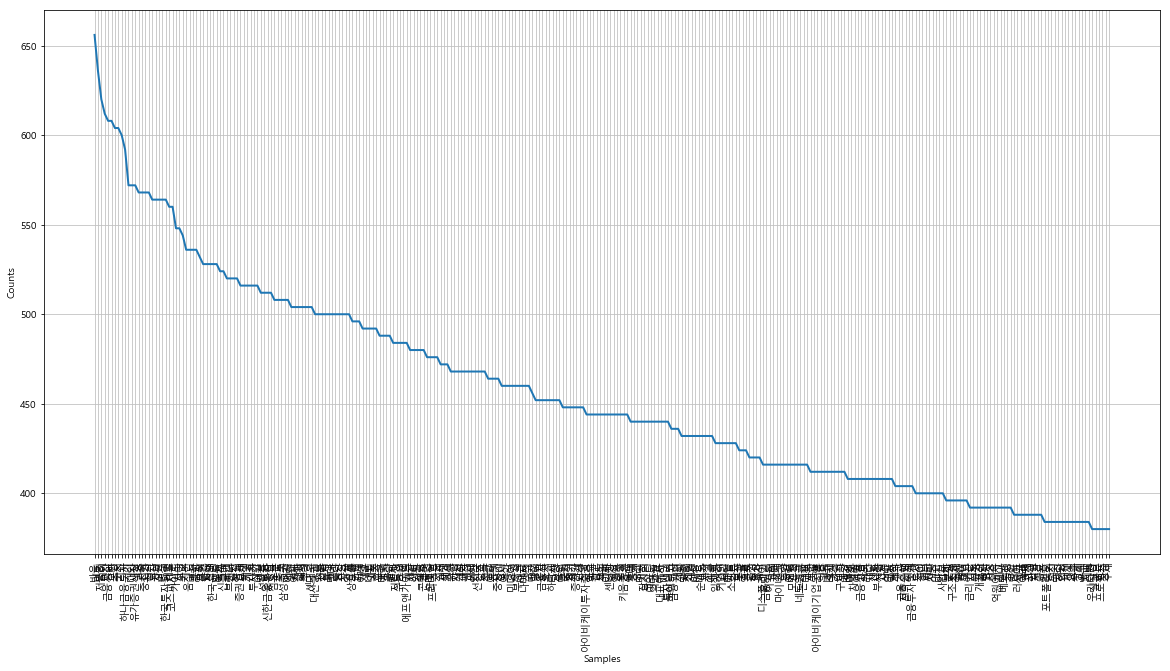

In [198]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
%matplotlib inline

font_location = 'malgun.ttf'  
#C:\\Users\\Administrator\\Documents\\asiasummer\\webdata\\
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)
plt.figure(figsize=(20,10))
txt.plot(300)

In [199]:
sel_token=[f[0] for f in txt.vocab().most_common(1000)]
print(sel_token[:10])

['반응', '변동', '저금리', '원인', '금융시장', '소비', '보장', '수치', '기조', '하나금융투자']


### 용어 빈도수

In [200]:
def frev(doc):
    return [doc.count(stoken) for stoken in sel_token]

### 학습 데이터, 테스트 데이터 셋 만듬

In [201]:
X_train, X_test, y_train, y_test = train_test_split(article.content, [1 if x >= 0 else 0 for x in article.change], test_size=0.1, random_state=0)

In [202]:
train_x = [frev(d) for d in X_train]
train_y = [d for d in y_train]

test_x = [frev(d) for d in X_test]
test_y = [d for d in y_test]


In [203]:
import numpy as np
train_x=np.asarray(train_x).astype('float32')
train_y=np.asarray(train_y).astype('float32')
test_x=np.asarray(test_x).astype('float32')
test_y=np.asarray(test_y).astype('float32')

In [204]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((948, 1000), (948,), (106, 1000), (106,))

In [205]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout, Activation

### 딥러닝 모델 학습

### 이진 분류 문제에서는 binary_crossentropy가 좋다

In [ ]:
np.random.seed(0)
model=models.Sequential()

model.add(layers.Dense(100, activation='relu',input_shape=(1000,)))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(lr=0.0001)
             ,loss=losses.binary_crossentropy
             ,metrics=['accuracy']
            )
hist = model.fit(train_x,train_y,epochs=300,batch_size=500, validation_data=(test_x, test_y), verbose = 2)

## 모델 저장

## 모델 불러오기

In [ ]:
from keras.models import load_model
model07 = tf.keras.models.load_model('300_1000_binary_cross_65.h5')

In [ ]:
model07.summary()

### test_data로 예측

In [220]:
def predict_pos_neg(review, change):
    token = review.split()
    tf = frev(token)
    data = np.expand_dims(np.asarray(tf).astype('float64'), axis=0)
    score = float(model07.predict(data))
    print(score)
    if(score > 0.5):
        #print("[{}]\n".format(review))
        print("{:.2f}% 확률로 주가가 상승또는 유지 할것으로 추측해봅니다\n".format(score * 100))
        print("실제 변화율 : {}\n".format(change))
    else:
        #print("[{}]\n".format(review))
        print("{:.2f}% 확률로 주가가 하락할 것으로 추측해봅니다\n".format((1-score) * 100))
        print("실제 변화율 : {}\n".format(change))

In [221]:
predict_pos_neg(article.content[1001],article.change[1001])

3.3218432236026274e-06
100.00% 확률로 주가가 하락할 것으로 추측해봅니다

실제 변화율 : -0.032051282



### 정확도, loss등 그래프

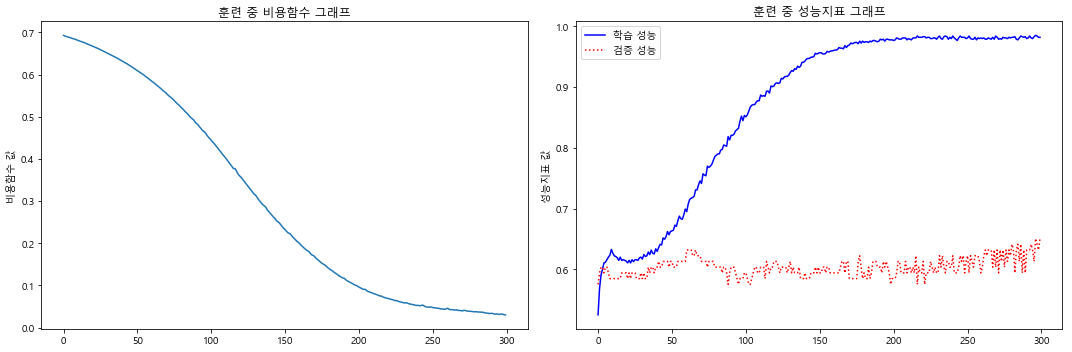

In [222]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("훈련 중 비용함수 그래프")
plt.ylabel("비용함수 값")
plt.subplot(1, 2, 2)
plt.title("훈련 중 성능지표 그래프")
plt.ylabel("성능지표 값")
plt.plot(hist.history['acc'], 'b-', label="학습 성능")
plt.plot(hist.history['val_acc'], 'r:', label="검증 성능")
plt.legend()
plt.tight_layout()
plt.show()

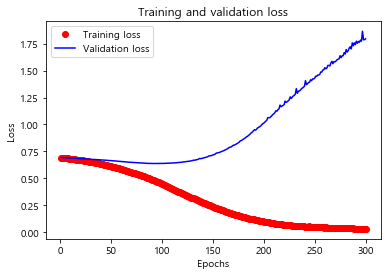

In [223]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

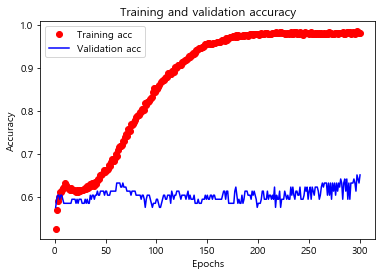

In [224]:
plt.clf()   # 그래프를 초기화합니다
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig2 = plt.gcf()

plt.draw()